In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X_train = df[['petal_length','petal_width']]
species_to_num = {'setosa':0,
                 'versicolor':1,
                 'virginica':2}
df['species']=df['species'].map(species_to_num)
y_train=df['species']

In [7]:
print(X_train)
print(y_train)

     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
5             1.7          0.4
6             1.4          0.3
7             1.5          0.2
8             1.4          0.2
9             1.5          0.1
10            1.5          0.2
11            1.6          0.2
12            1.4          0.1
13            1.1          0.1
14            1.2          0.2
15            1.5          0.4
16            1.3          0.4
17            1.4          0.3
18            1.7          0.3
19            1.5          0.3
20            1.7          0.2
21            1.5          0.4
22            1.0          0.2
23            1.7          0.5
24            1.9          0.2
25            1.6          0.2
26            1.6          0.4
27            1.5          0.2
28            1.4          0.2
29            1.6          0.2
..            ...          ...
120     

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

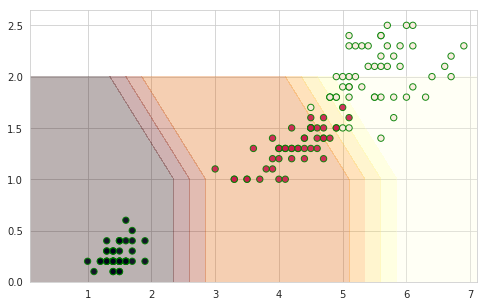

In [32]:
Xv = X_train.values.reshape(-1,1)
h=0.02
x_min, x_max = Xv.min(), Xv.max()+1
y_min, y_max = y_train.min(), y_train.max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max,1),
                    np.arange(y_min, y_max,1))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx,yy,z,cmap='afmhot', alpha =0.3);
plt.scatter(X_train.values[:,0], X_train.values[:,1],c=y_train,s=40, alpha = 0.9, edgecolors='g');